In [1]:
import numpy as np
from oncotree import OncoNode,OncoTree
from IPython.display import Image

In [2]:
np.random.seed(1)
root = OncoNode(genes=[], f=1)
c0 = OncoNode(parent=root, genes=[0], f=0.9)
c1 = OncoNode(parent=root, genes=[1], f=0.8)
c2 = OncoNode(parent=root, genes=[2], f=0.3)
c3 = OncoNode(parent=root, genes=[3], f=0.5)
c4 = OncoNode(parent=root, genes=[4,5], f=0.2)
c5 = OncoNode(parent=root, genes=[6,7,8], f=0.8)
c6 = OncoNode(parent=root, genes=[9], f=0.8)
c7 = OncoNode(parent=root, genes=[10,11], f=0.9)
c60 = OncoNode(parent=c6, genes=[12,13], f=0.5)
c61 = OncoNode(parent=c6, genes=[14,15], f=0.7)
c62 = OncoNode(parent=c6, genes=[16], f=0.3)
c70 = OncoNode(parent=c7, genes=[17,18], f=0.4)
c71 =  OncoNode(parent=c7, genes=[19], f=0.3)
c600 = OncoNode(parent=c60, genes=[20], f=0.5)
c610 = OncoNode(parent=c61, genes=[21], f=0.8)
c611 = OncoNode(parent=c61, genes=[22, 23], f=0.7)
c620 = OncoNode(parent=c62, genes=[24], f=0.3)
c700 = OncoNode(parent=c70, genes=[25], f=0.8)
c701 = OncoNode(parent=c70, genes=[26, 27], f=0.3)
ps = OncoNode(genes=[28,29,30,31], f=0)
gen_progmo = OncoTree([root, c0, c1, c2, c3, c4, c5, c6, c7, c60, c61, c62, c70, c71, c600, c610, c611, c620, c700, c701, ps], pfp=0.02, pfn=0.02)

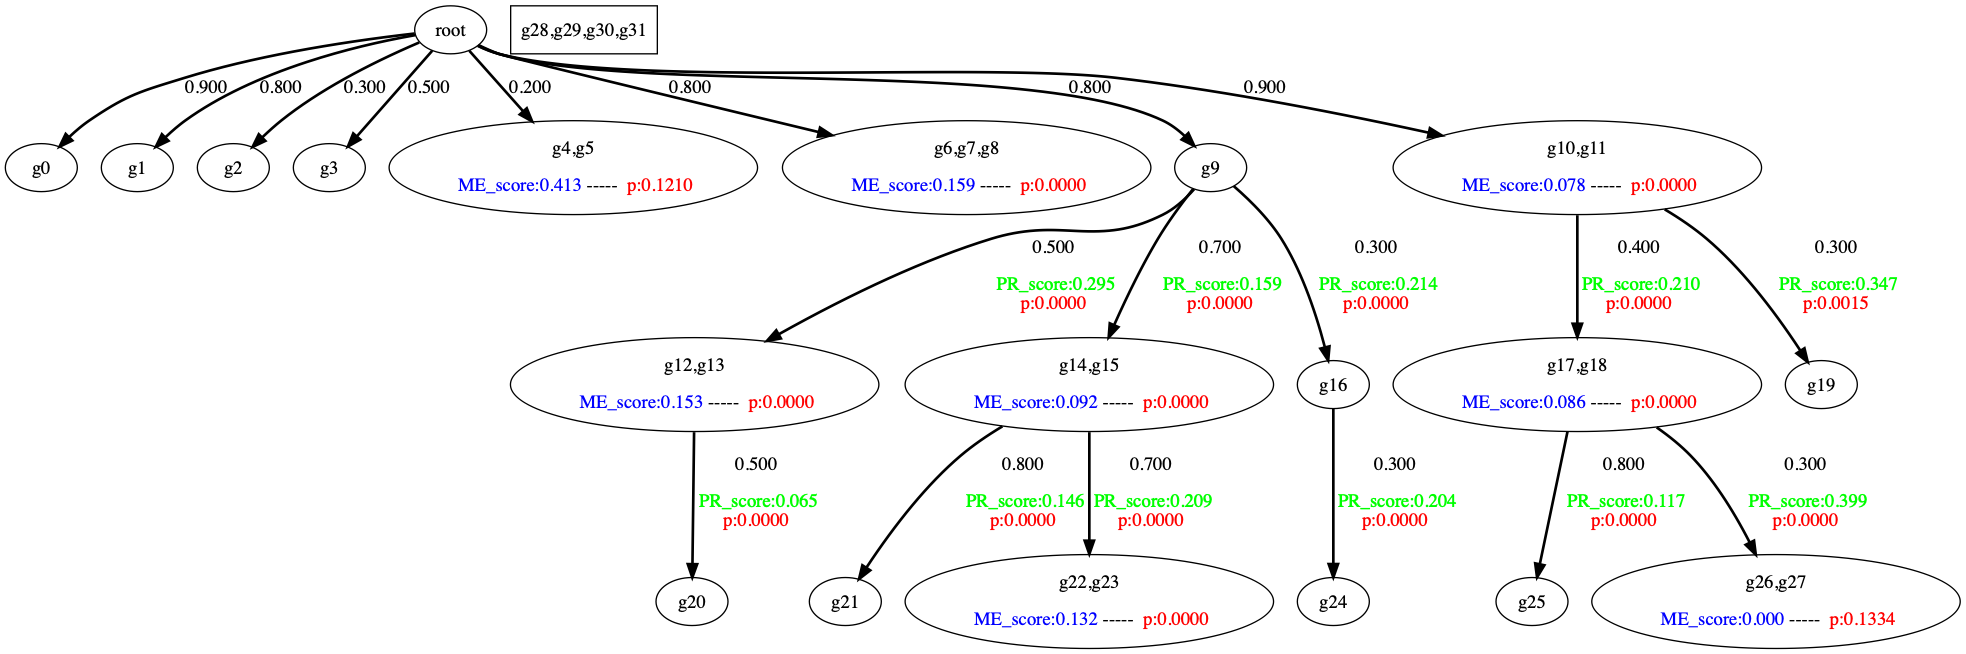

In [3]:
n_tumors = 400
dataset, clean_dataset =gen_progmo.draw_sample(n_tumors)
gen_llh = gen_progmo.likelihood(dataset)
gen_posterior = gen_llh + gen_progmo.prior()
epsilon_hat, delta_hat, e_hat = gen_progmo.min_errors(dataset)
gen_progmo.to_dot(dataset, fig_file='demo/demo_gen.png', show_passengers=True)
Image('demo/demo_gen.png')

# 1- Horizontal Merge
* Forward Kernel:
    * Select a pair of sibling leaves
* Backward Kernel:
    * Select a node which:
       * Is a leaf node
       * Has at least two genes
    * Partition the genes in it into two non-empty subsets

In [4]:
proposal, forward_prob, backward_prob, novel_proposal = gen_progmo.ss_hmerge(dataset, True, True)
print("Forward prob: %.5f"%np.exp(forward_prob))
print("Backward prob: %.5f"%np.exp(backward_prob))

Candidates:
[0] , [1]
[0] , [2]
[0] , [3]
[0] , [4, 5]
[0] , [6, 7, 8]
[1] , [2]
[1] , [3]
[1] , [4, 5]
[1] , [6, 7, 8]
[2] , [3]
[2] , [4, 5]
[2] , [6, 7, 8]
[3] , [4, 5]
[3] , [6, 7, 8]
[4, 5] , [6, 7, 8]
[21] , [22, 23]
[25] , [26, 27]
Selected pair:
[0] , [3]
Backward candidates:
[0, 3]
[4, 5]
[6, 7, 8]
[22, 23]
[26, 27]
Forward prob: 0.05882
Backward prob: 0.20000


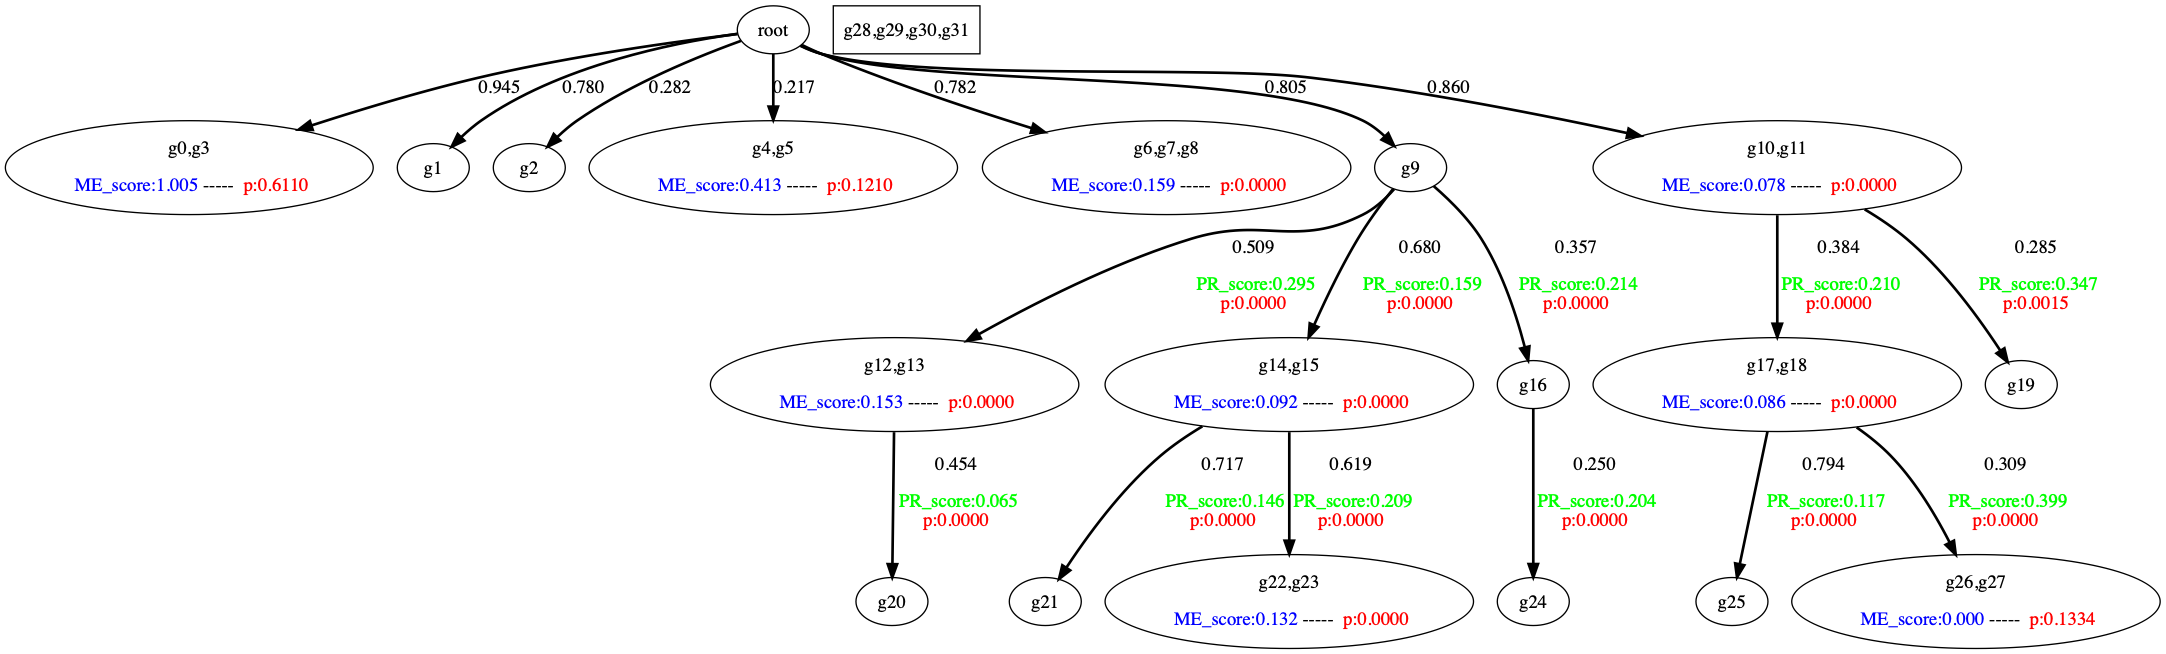

In [5]:
proposal.to_dot(dataset, fig_file='demo/demo_hmerge.png', show_passengers=True)
Image('demo/demo_hmerge.png')

# 2- Horizontal Split
* Forward Kernel:
    * Select a node which:
       * Is a leaf node
       * Has at least two genes
    * Partition the genes in it into two non-empty subsets
* Backward Kernel:
    * Select a pair of sibling leaves

In [6]:
proposal, forward_prob, backward_prob, novel_proposal = gen_progmo.ss_hsplit(dataset, True, True)
print("Forward prob: %.5f"%np.exp(forward_prob))
print("Backward prob: %.5f"%np.exp(backward_prob))

Node candidates:
[4, 5]
[6, 7, 8]
[22, 23]
[26, 27]
Selected node:
[22, 23]
Selected subset:
[23]
Backward candidates:
[0] , [1]
[0] , [2]
[0] , [3]
[0] , [4, 5]
[0] , [6, 7, 8]
[1] , [2]
[1] , [3]
[1] , [4, 5]
[1] , [6, 7, 8]
[2] , [3]
[2] , [4, 5]
[2] , [6, 7, 8]
[3] , [4, 5]
[3] , [6, 7, 8]
[4, 5] , [6, 7, 8]
[21] , [22]
[21] , [23]
[22] , [23]
[25] , [26, 27]
Forward prob: 0.25000
Backward prob: 0.05263


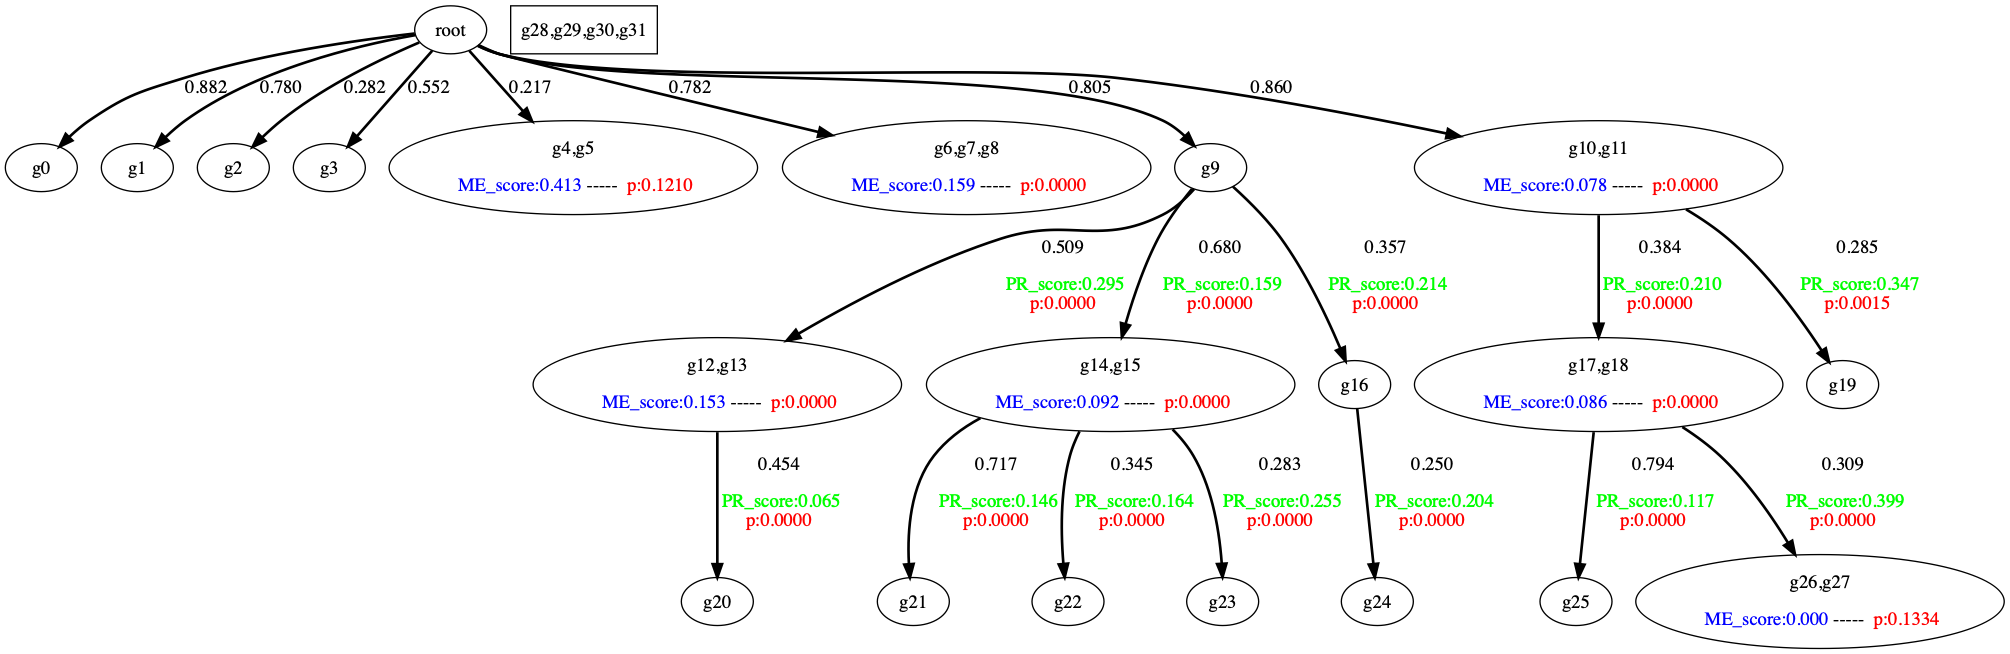

In [7]:
proposal.to_dot(dataset, fig_file='demo/demo_hsplit.png', show_passengers=True)
Image('demo/demo_hsplit.png')

# 3- Vertical Merge
* Forward Kernel:
    * Select a leaf, not in the first level (the parent should include genes)
* Backward Kernel:
    * Select a node which has at least two genes
    * Select a non-empty, non-full subset of its genes to pass to a new child

In [8]:
proposal, forward_prob, backward_prob, novel_proposal = gen_progmo.ss_vmerge(dataset, True, True)
print("Forward prob: %.5f"%np.exp(forward_prob))
print("Backward prob: %.5f"%np.exp(backward_prob))

Candidates:
[19]
[20]
[21]
[22, 23]
[24]
[25]
[26, 27]
Selected node:
[20]
Backward candidates:
[4, 5]
[6, 7, 8]
[10, 11]
[12, 13, 20]
[14, 15]
[17, 18]
[22, 23]
[26, 27]
Forward prob: 0.14286
Backward prob: 0.02083


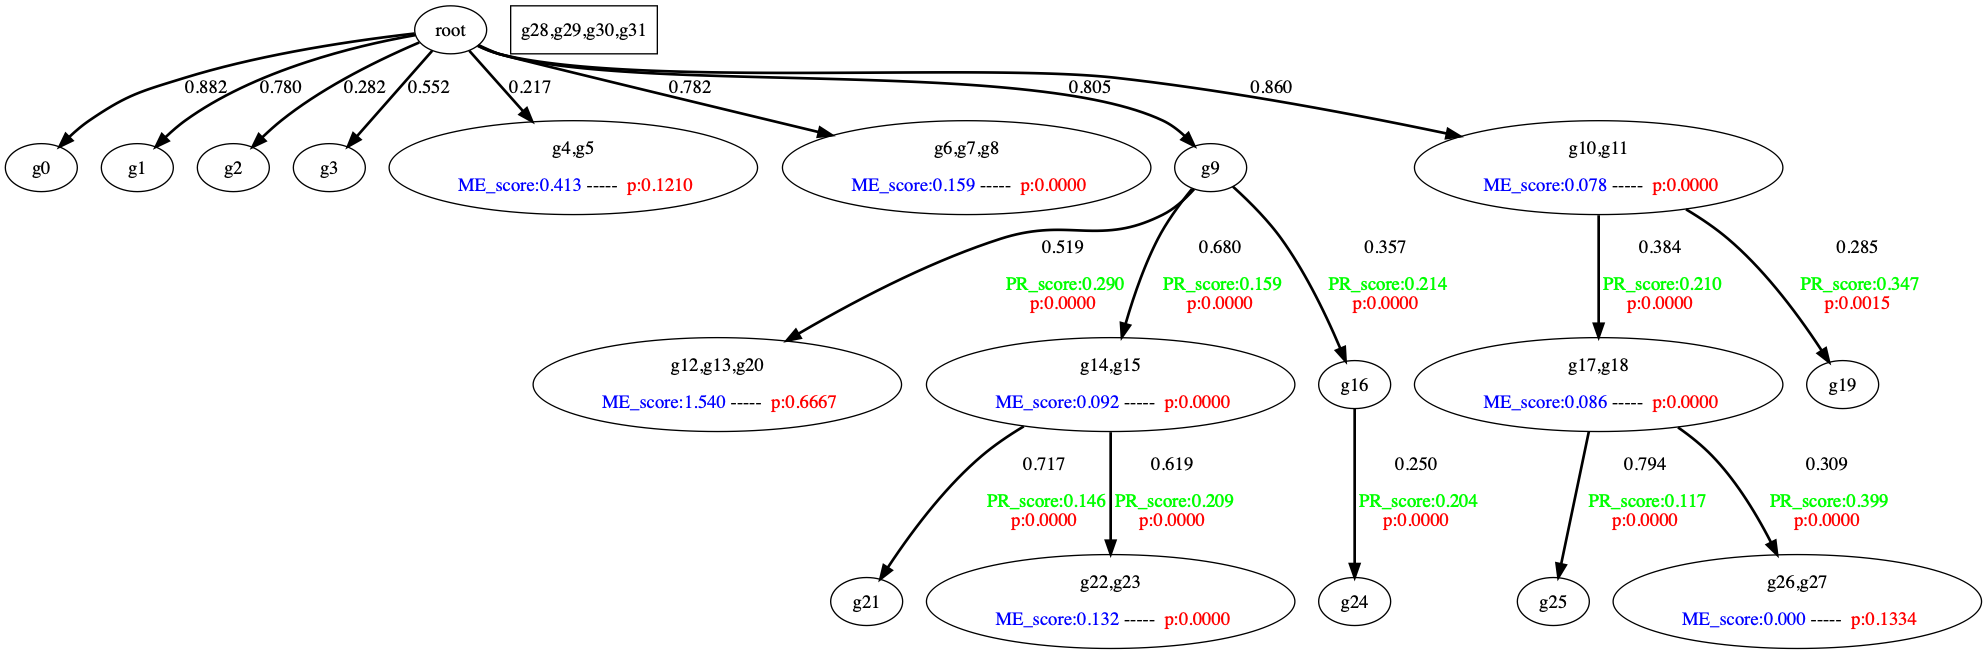

In [9]:
proposal.to_dot(dataset, fig_file='demo/demo_vmerge.png', show_passengers=True)
Image('demo/demo_vmerge.png')

# 4- Vertical Split
* Forward Kernel:
    * Select a node which has at least two genes
    * Select a non-empty, non-full subset of its genes to pass to a new child
* Backward Kernel:
    * Select a leaf, not in the first level (the parent should include genes)

In [10]:
proposal, forward_prob, backward_prob, novel_proposal = gen_progmo.ss_vsplit(dataset, True, True)
print("Forward prob: %.5f"%np.exp(forward_prob))
print("Backward prob: %.5f"%np.exp(backward_prob))

Candidates:
[4, 5]
[6, 7, 8]
[10, 11]
[12, 13]
[14, 15]
[17, 18]
[22, 23]
[26, 27]
Selected node:
[26, 27]
Selected subset:
[26]
Backward candidates:
[19]
[20]
[21]
[22, 23]
[24]
[25]
[26]
Forward prob: 0.06250
Backward prob: 0.14286


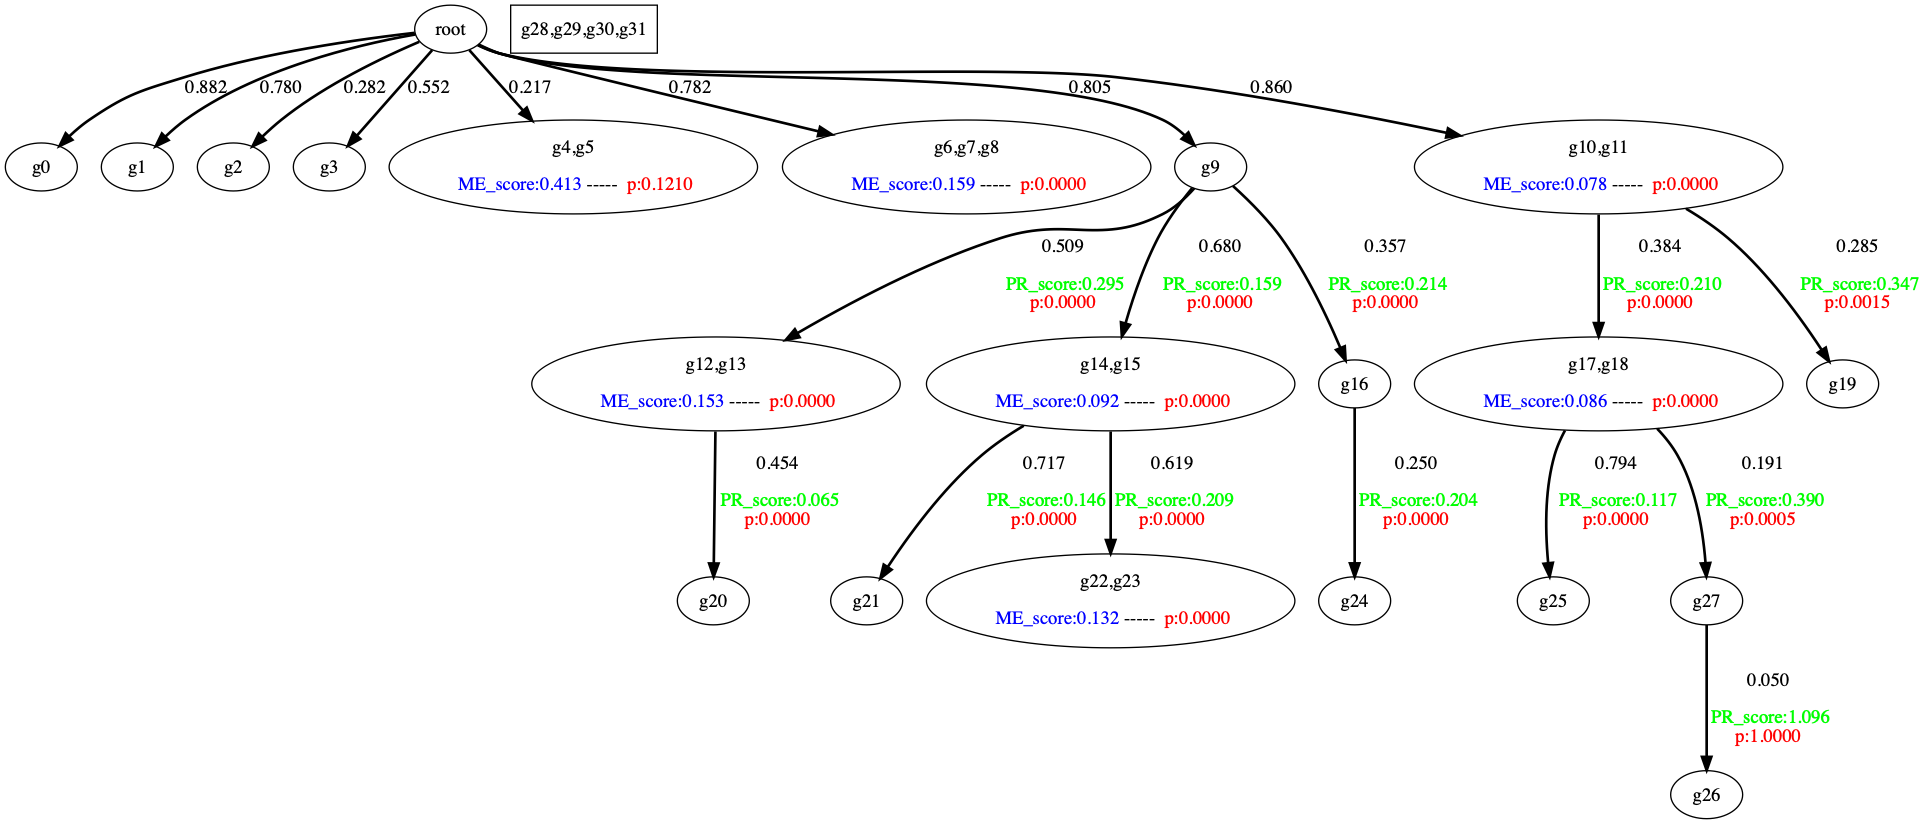

In [11]:
proposal.to_dot(dataset, fig_file='demo/demo_vsplit.png', show_passengers=True)
Image('demo/demo_vsplit.png')

# 5- Swap Genes
* Forward Kernel:
    * Select a node not in the first layer (the parent should include genes)
* Backward Kernel:
    * Equal forward and backward probs, hence, no need for calculations

In [12]:
proposal, forward_prob, backward_prob, novel_proposal = gen_progmo.ss_swap(dataset, True, True)
print("Forward prob: %.5f"%np.exp(forward_prob))
print("Backward prob: %.5f"%np.exp(backward_prob))

Candidates:
[12, 13]
[14, 15]
[16]
[17, 18]
[19]
[20]
[21]
[22, 23]
[24]
[25]
[26, 27]
Selected node:
[26, 27]
Forward prob: 1.00000
Backward prob: 1.00000


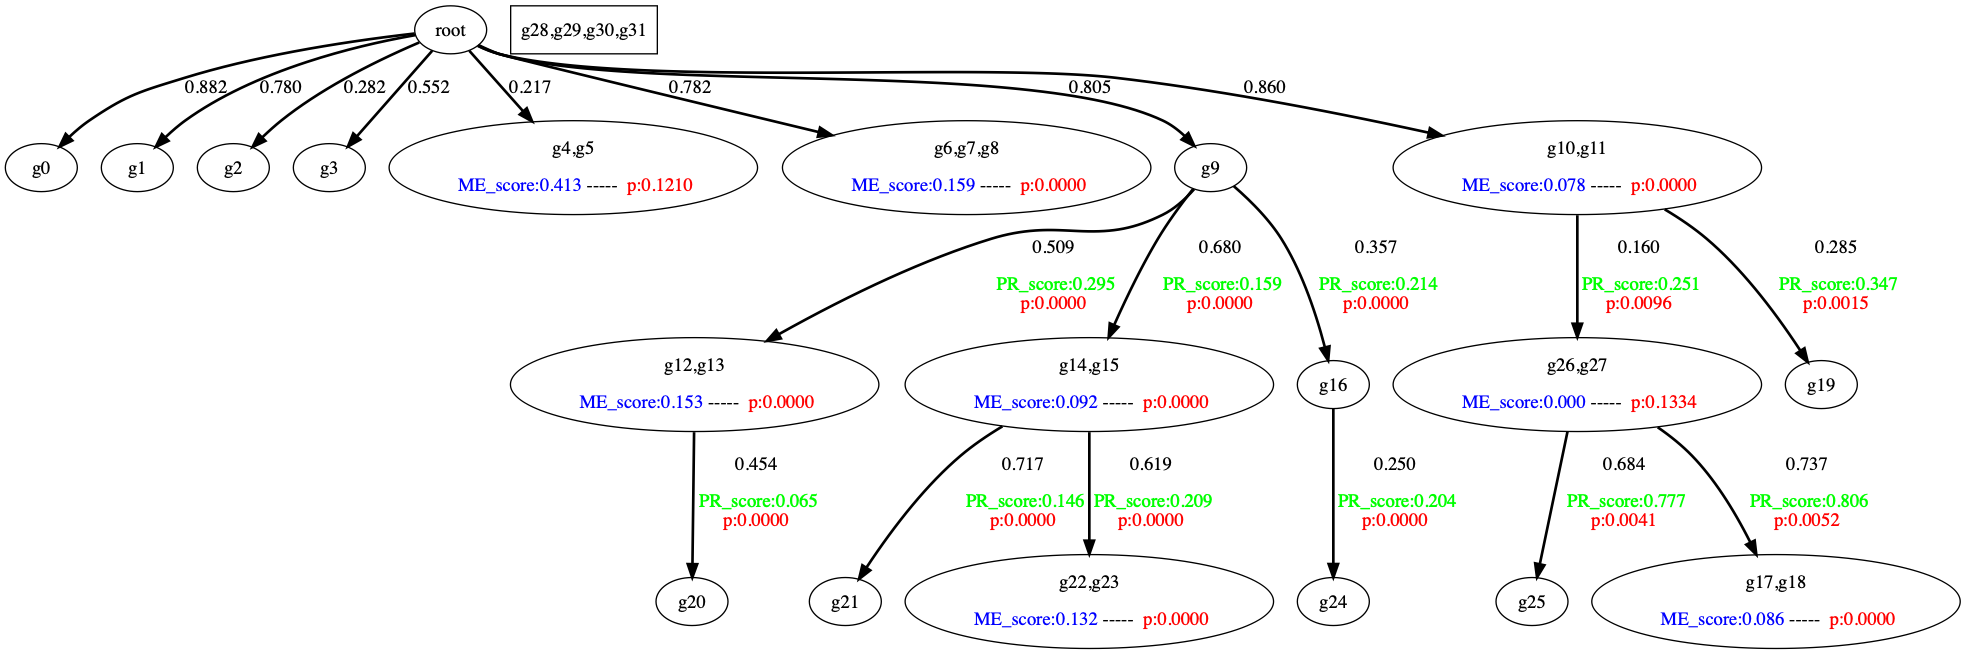

In [13]:
proposal.to_dot(dataset, fig_file='demo/demo_swap.png', show_passengers=True)
Image('demo/demo_swap.png')

# 6- SPR (Subtree Pruning and Regrafting)
* Forward Kernel:
    * Select a node (not root) which is not a simple node (simple nodes are the root children including a single gene)
        * SPR type moves of the simple nodes are covered in SAttach move type
    * Select a parent node that
        * is not in the selected node's subtree (including itself)
        * is not root, if the selected node includes a single gene and has no children (so that the move won't result in a simple node)
* Backward Kernel:
    * Equal forward and backward probs, hence, no need for calculations

In [14]:
proposal, forward_prob, backward_prob, novel_proposal = gen_progmo.ss_spr(dataset, True, True)
print("Forward prob: %.5f"%np.exp(forward_prob))
print("Backward prob: %.5f"%np.exp(backward_prob))

Candidates:
[4, 5]
[6, 7, 8]
[9]
[10, 11]
[12, 13]
[14, 15]
[16]
[17, 18]
[19]
[20]
[21]
[22, 23]
[24]
[25]
[26, 27]
Selected node:
[22, 23]
Parent candidates:
[]
[0]
[1]
[2]
[3]
[4, 5]
[6, 7, 8]
[9]
[10, 11]
[12, 13]
[14, 15]
[16]
[17, 18]
[19]
[20]
[21]
[24]
[25]
[26, 27]
Selected parent:
[9]
Forward prob: 1.00000
Backward prob: 1.00000


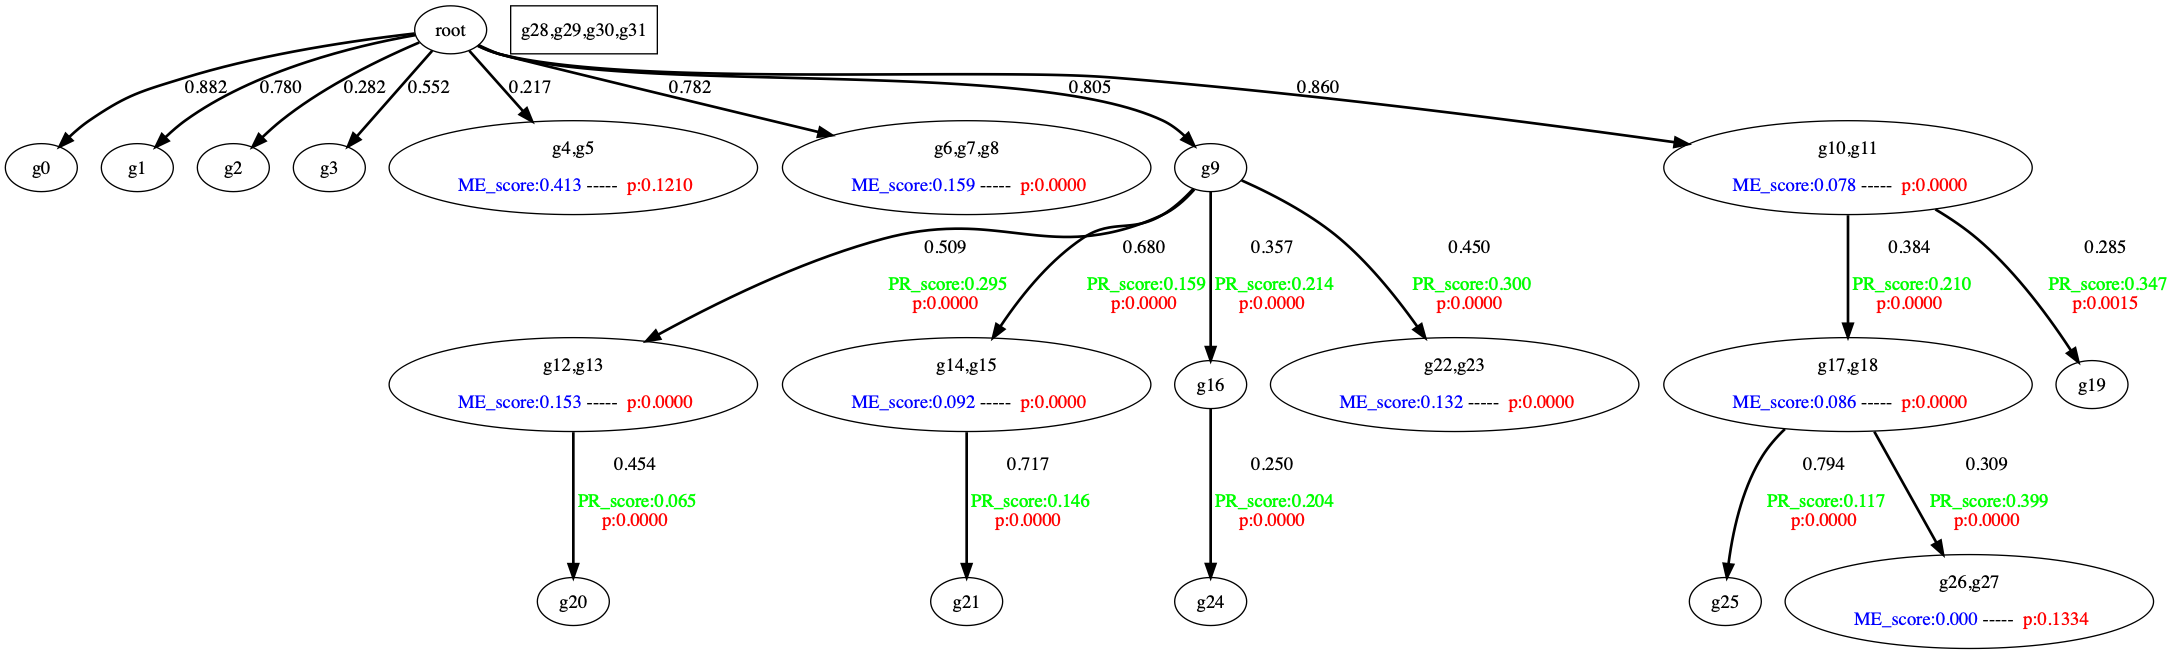

In [15]:
proposal.to_dot(dataset, fig_file='demo/demo_spr.png', show_passengers=True)
Image('demo/demo_spr.png')

# 7- Gene Transfer D2P (driver tree to passengers set)
* Forward Kernel:
    * Select a node in the driver tree with at least two genes
    * Select one of its genes
* Backward Kernel:
    * Select a gene from the set of passesngers
    * Select a node in the tree

In [16]:
proposal, forward_prob, backward_prob, novel_proposal = gen_progmo.ss_gt_d2p(dataset, True, True)
print("Forward prob: %.5f"%np.exp(forward_prob))
print("Backward prob: %.5f"%np.exp(backward_prob))

Candidates:
[4, 5]
[6, 7, 8]
[10, 11]
[12, 13]
[14, 15]
[17, 18]
[22, 23]
[26, 27]
Selected node:
[14, 15]
Selected gene:
14
Forward prob: 0.06250
Backward prob: 0.01053


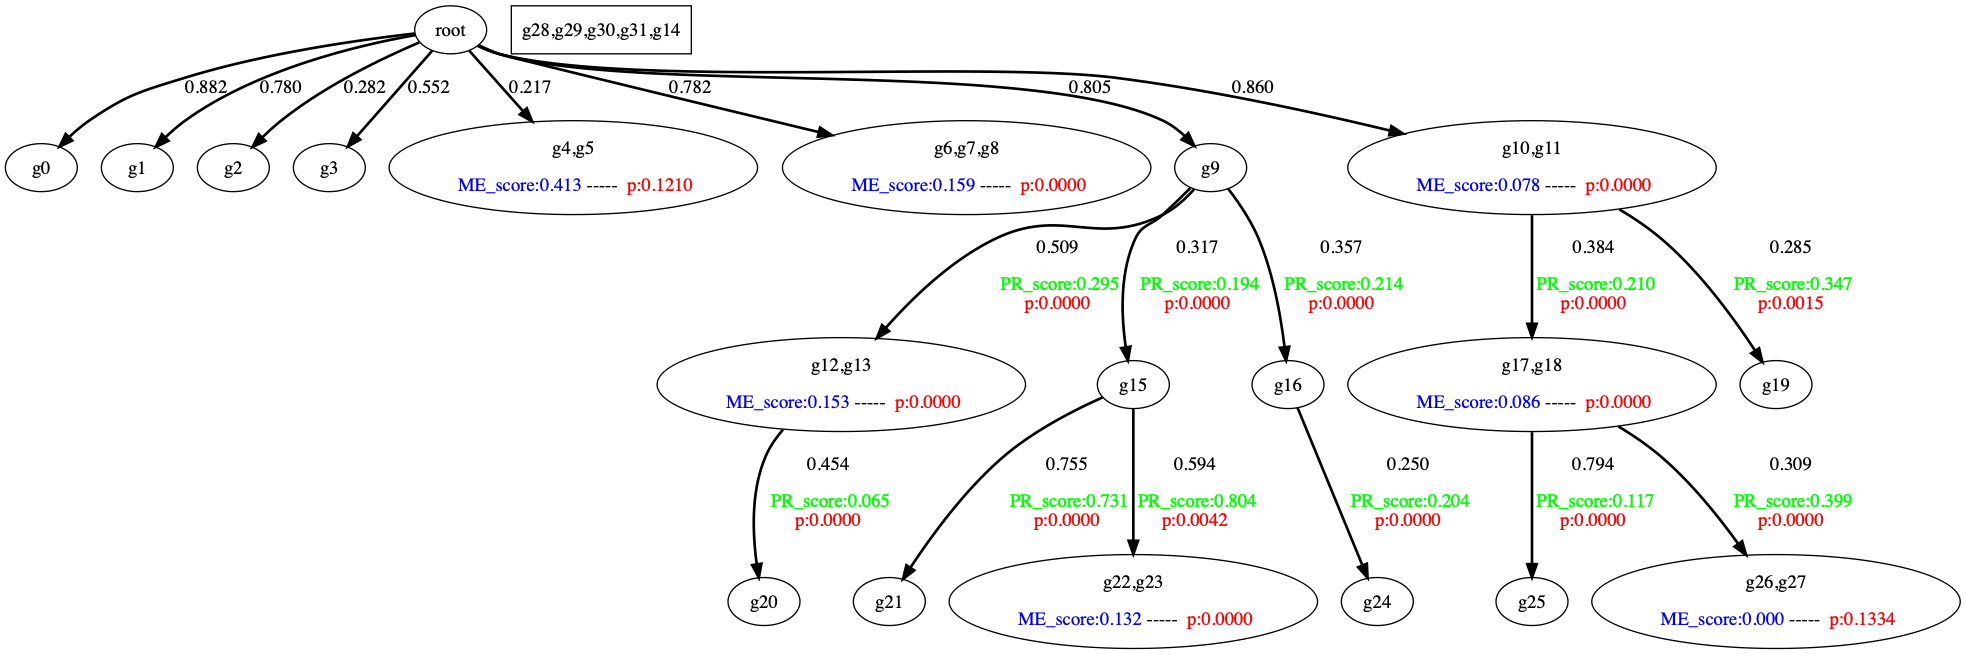

In [17]:
proposal.to_dot(dataset, fig_file='demo/demo_gt_d2p.png', show_passengers=True)
Image('demo/demo_gt_d2p.png')

# 8- Gene Transfer P2D (passengers set to driver tree)
* Forward Kernel:
    * Select a gene from the set of passesngers
    * Select a node in the tree
* Backward Kernel:
    * Select a node in the driver tree with at least two genes
    * Select one of its genes

In [18]:
proposal, forward_prob, backward_prob, novel_proposal = gen_progmo.ss_gt_p2d(dataset, True, True)
print("Forward prob: %.5f"%np.exp(forward_prob))
print("Backward prob: %.5f"%np.exp(backward_prob))

Candidate genes:
[28, 29, 30, 31]
Selected gene:
30
Candidates:
[0]
[1]
[2]
[3]
[4, 5]
[6, 7, 8]
[9]
[10, 11]
[12, 13]
[14, 15]
[16]
[17, 18]
[19]
[20]
[21]
[22, 23]
[24]
[25]
[26, 27]
Selected node:
[21]
Backward candidates:
[4, 5]
[6, 7, 8]
[10, 11]
[12, 13]
[14, 15]
[17, 18]
[21, 30]
[22, 23]
[26, 27]
Forward prob: 0.01316
Backward prob: 0.05556


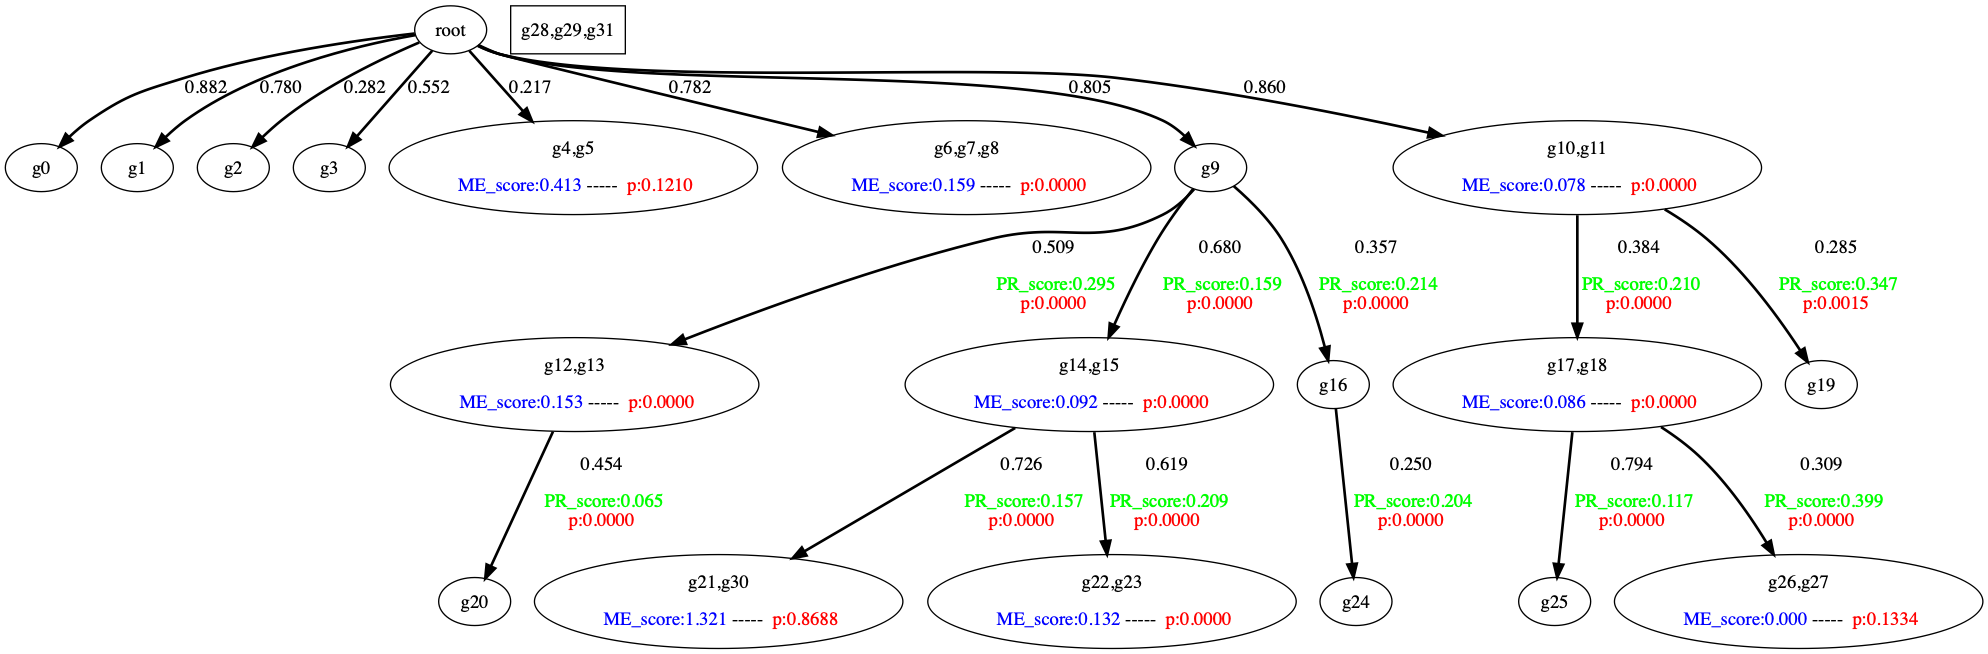

In [19]:
proposal.to_dot(dataset, fig_file='demo/demo_gt_p2d.png', show_passengers=True)
Image('demo/demo_gt_p2d.png')

# 9- Gene Transfer D2S (driver tree to simple node)
* Forward Kernel:
    * Select a node in the driver tree which:
        * Has at least two genes
        * Is not a first-level node with no children (as such a case is covered in Horizontal Split move type)
    * Select a gene from it
* Backward Kernel:
    * Select a simple node
    * Select a destination node which:
        * Is not root
        * Is not a first-level node with no children (as it will be a Horizontal Merge move type)

In [20]:
proposal, forward_prob, backward_prob, novel_proposal = gen_progmo.ss_gt_d2s(dataset, True, True)
print("Forward prob: %.5f"%np.exp(forward_prob))
print("Backward prob: %.5f"%np.exp(backward_prob))

Candidates:
[10, 11]
[12, 13]
[14, 15]
[17, 18]
[22, 23]
[26, 27]
Selected node:
[12, 13]
Selected gene:
13
List of simple nodes for backward move:
[0]
[1]
[2]
[3]
[13]
List of dest nodes for backward move:
[9]
[10, 11]
[12]
[14, 15]
[16]
[17, 18]
[19]
[20]
[21]
[22, 23]
[24]
[25]
[26, 27]
Forward prob: 0.08333
Backward prob: 0.01538


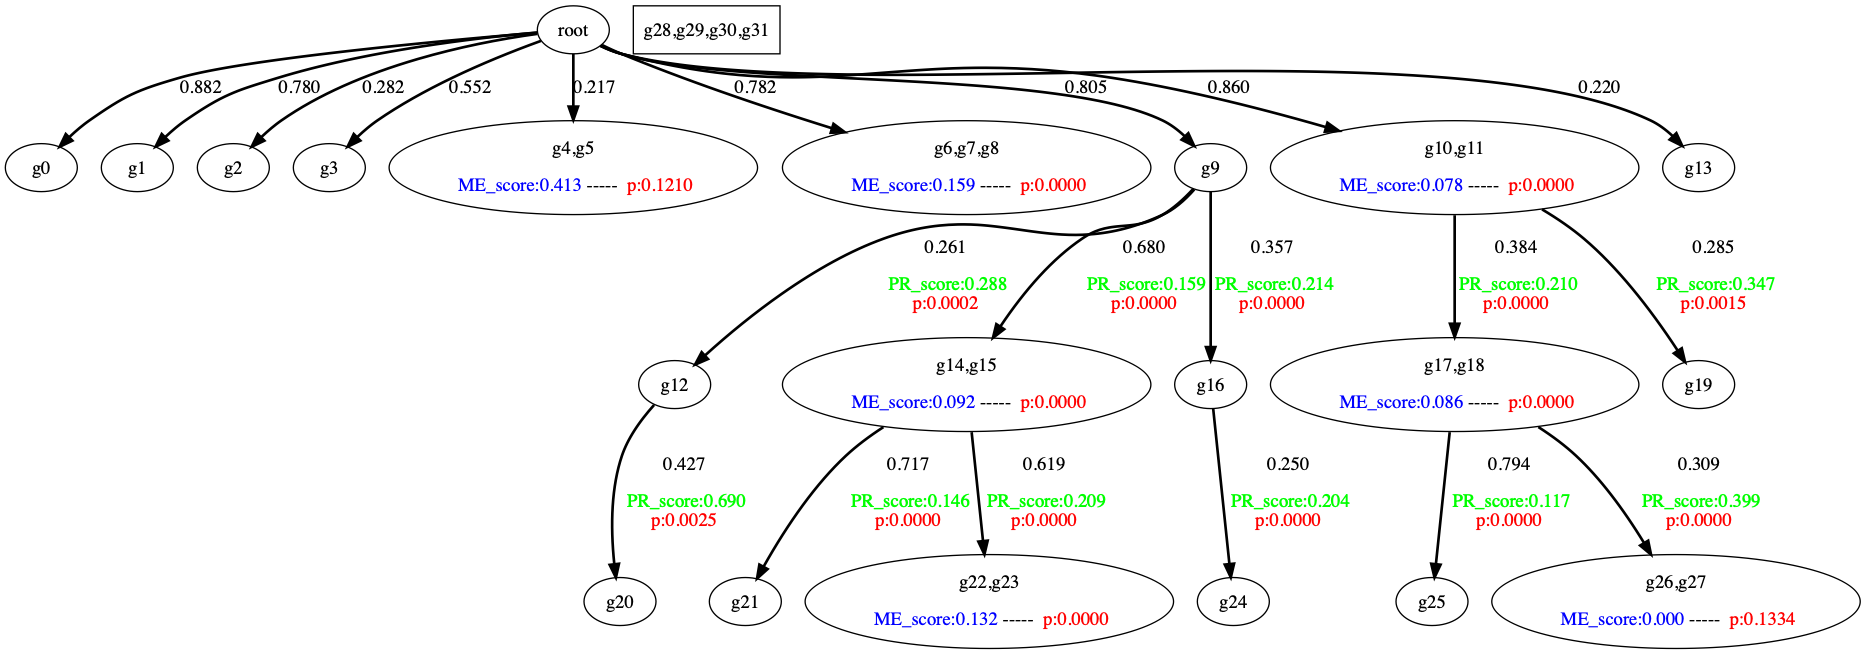

In [21]:
proposal.to_dot(dataset, fig_file='demo/demo_gt_d2s.png', show_passengers=True)
Image('demo/demo_gt_d2s.png')

# 10- Gene Transfer S2D (simple node to driver tree)
* Forward Kernel:
    * Select a simple node
    * Select a destination node which:
        * Is not root
        * Is not a first-level node with no children (as it will be a Horizontal Merge move type)
* Backward Kernel:
    * Select a node in the driver tree which:
        * Has at least two genes
        * Is not a first-level node with no children (as such a case is covered in Horizontal Split move type)
    * Select a gene from it

In [22]:
proposal, forward_prob, backward_prob, novel_proposal = gen_progmo.ss_gt_s2d(dataset, True, True)
print("Forward prob: %.5f"%np.exp(forward_prob))
print("Backward prob: %.5f"%np.exp(backward_prob))

List of simple nodes:
[0]
[1]
[2]
[3]
Selected node:
[3]
List of destination candidates:
[9]
[10, 11]
[12, 13]
[14, 15]
[16]
[17, 18]
[19]
[20]
[21]
[22, 23]
[24]
[25]
[26, 27]
Selected destination node:
[14, 15]
Backward candidates:
[10, 11]
[12, 13]
[14, 15, 3]
[17, 18]
[22, 23]
[26, 27]
Forward prob: 0.01923
Backward prob: 0.05556


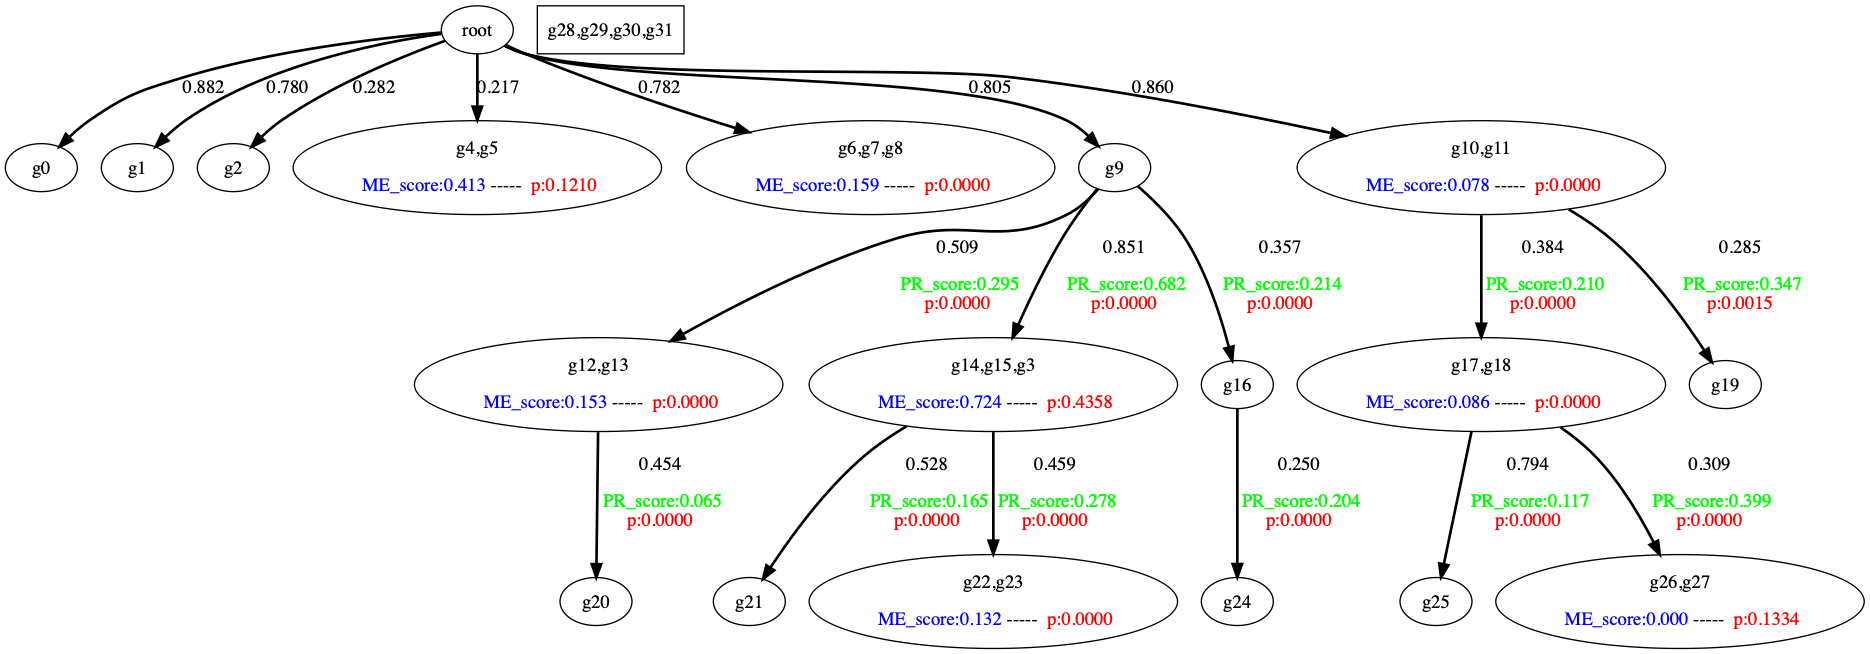

In [23]:
proposal.to_dot(dataset, fig_file='demo/demo_gt_s2d.png', show_passengers=True)
Image('demo/demo_gt_s2d.png')

# 11- SDetach (Detach a leaf and put its genes into simple nodes)
* Forward Kernel:
    * Select a leaf which
        * Is not a first-level node with one gene (corresponding to no move) or two genes (as such a case is covered in Horizontal Split move type)
* Backward Kernel:
    * Select a non-empty subset of the simple nodes
    * Select a destination parent node which is:
        * Not among the selected subset of simple nodes
        * Not root (and not P), if the subset includes one or two node (hence, one or two gene)
            * Note that the case of two nodes is a Horizontal Merge move
        * Any node (except P), otherwise

In [24]:
proposal, forward_prob, backward_prob, novel_proposal = gen_progmo.ss_sdetach(dataset, True, True)
print("Forward prob: %.5f"%np.exp(forward_prob))
print("Backward prob: %.5f"%np.exp(backward_prob))

Candidates:
[6, 7, 8]
[19]
[20]
[21]
[22, 23]
[24]
[25]
[26, 27]
Selected node:
[24]
Simple nodes for backward move:
[0]
[1]
[2]
[3]
[24]
Forward prob: 0.12500
Backward prob: 0.00179


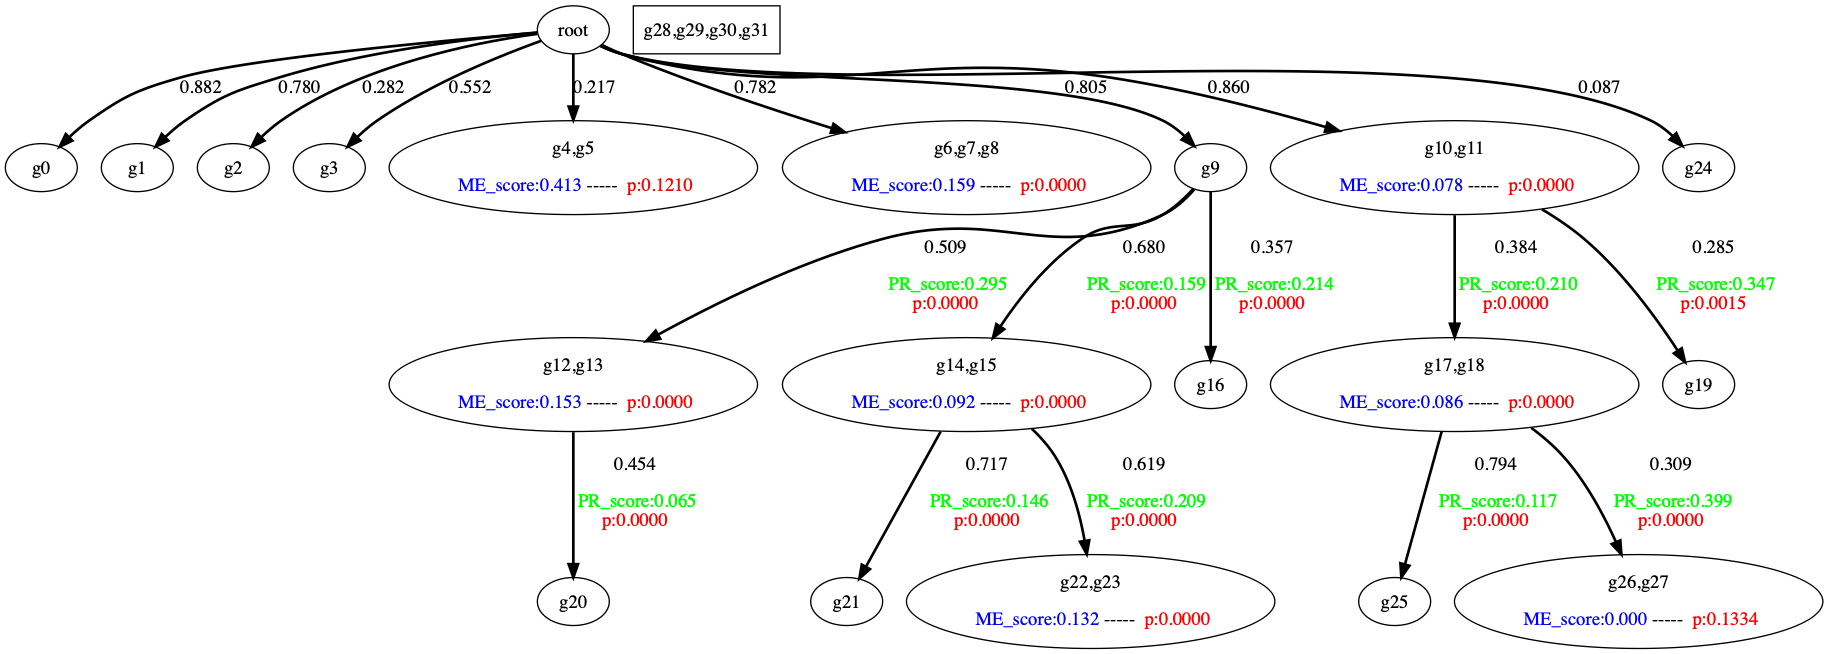

In [25]:
proposal.to_dot(dataset, fig_file='demo/demo_sdetach.png', show_passengers=True)
Image('demo/demo_sdetach.png')

# 12- SAttach (Attach a subset of simple nodes to the tree as a new leaf)
* Forward Kernel:
    * Select a non-empty subset of the simple nodes
    * Select a destination parent node which is:
        * Not among the selected subset of simple nodes
        * Not root (and not P), if the subset includes one or two node (hence, one or two gene)
            * Note that the case of two nodes is a Horizontal Merge move
        * Any node (except P), otherwise
* Backward Kernel:
    * Select a leaf which
        * Is not a first-level node with one gene (corresponding to no move) or two genes (as such a case is covered in Horizontal Split move type

In [26]:
proposal, forward_prob, backward_prob, novel_proposal = gen_progmo.ss_sattach(dataset, True, True)
print("Forward prob: %.5f"%np.exp(forward_prob))
print("Backward prob: %.5f"%np.exp(backward_prob))

List of simple nodes:
[0]
[1]
[2]
[3]
Selected subset:
[3]
Candidates for parent node:
[0]
[1]
[2]
[4, 5]
[6, 7, 8]
[9]
[10, 11]
[12, 13]
[14, 15]
[16]
[17, 18]
[19]
[20]
[21]
[22, 23]
[24]
[25]
[26, 27]
Selected parent:
[12, 13]
Backward candidates:
[6, 7, 8]
[19]
[20]
[21]
[22, 23]
[24]
[25]
[26, 27]
[3]
Forward prob: 0.00370
Backward prob: 0.11111


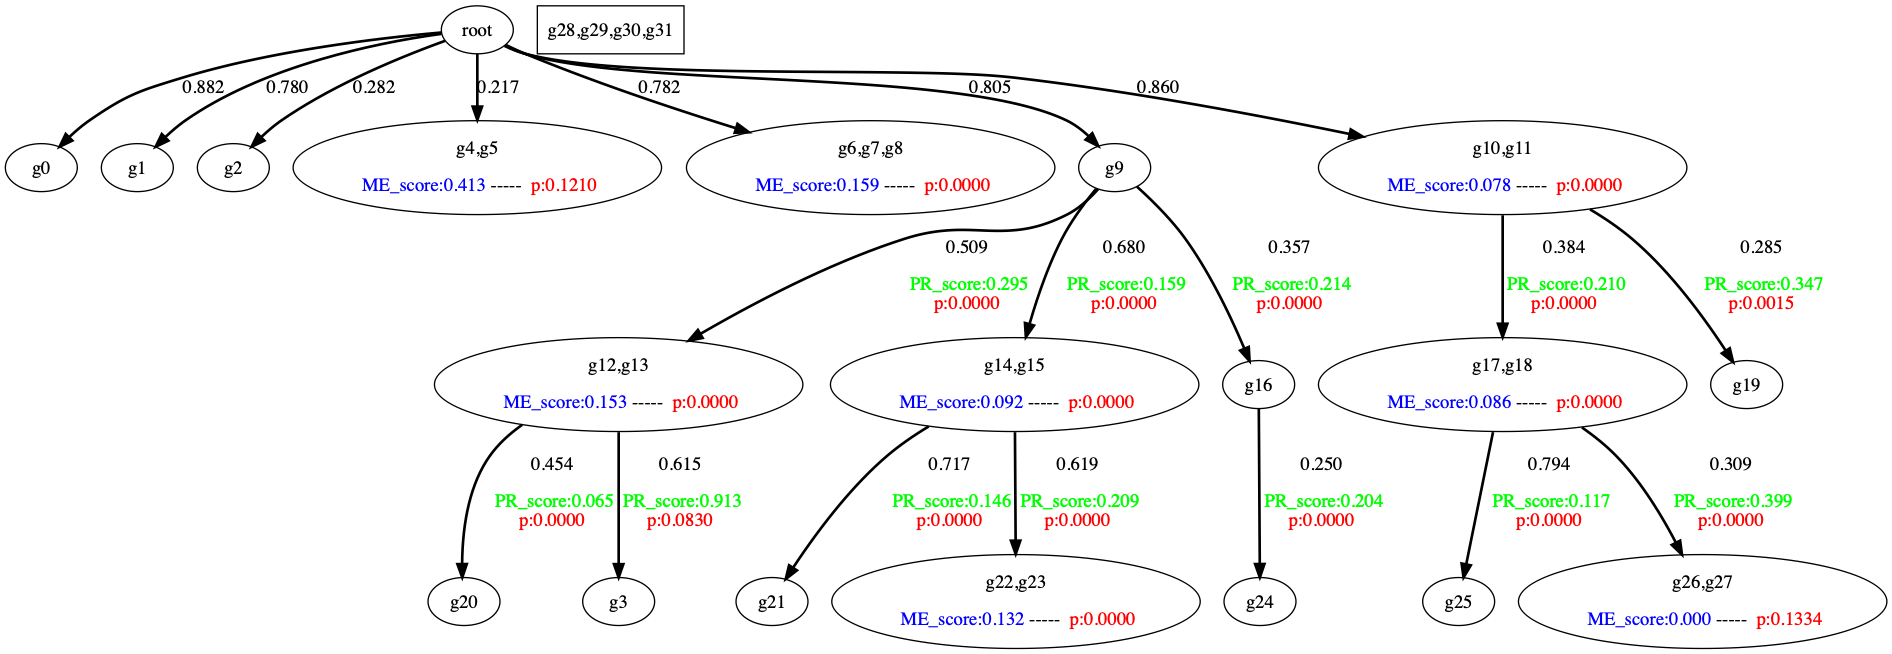

In [27]:
proposal.to_dot(dataset, fig_file='demo/demo_sattach.png', show_passengers=True)
Image('demo/demo_sattach.png')

# 13- PDetach (Detach a leaf and put its genes into the set of passsengers)
* Forward Kernel:
    * Select a leaf node
* Backward Kernel:
    * Select a non-empty subset of the set of passengers
    * Select a destination parent node (not P)

In [28]:
proposal, forward_prob, backward_prob, novel_proposal = gen_progmo.ss_pdetach(dataset, True, True)
print("Forward prob: %.5f"%np.exp(forward_prob))
print("Backward prob: %.5f"%np.exp(backward_prob))

Candidates:
[0]
[1]
[2]
[3]
[4, 5]
[6, 7, 8]
[19]
[20]
[21]
[22, 23]
[24]
[25]
[26, 27]
Selected node:
[20]
Forward prob: 0.07692
Backward prob: 0.00170


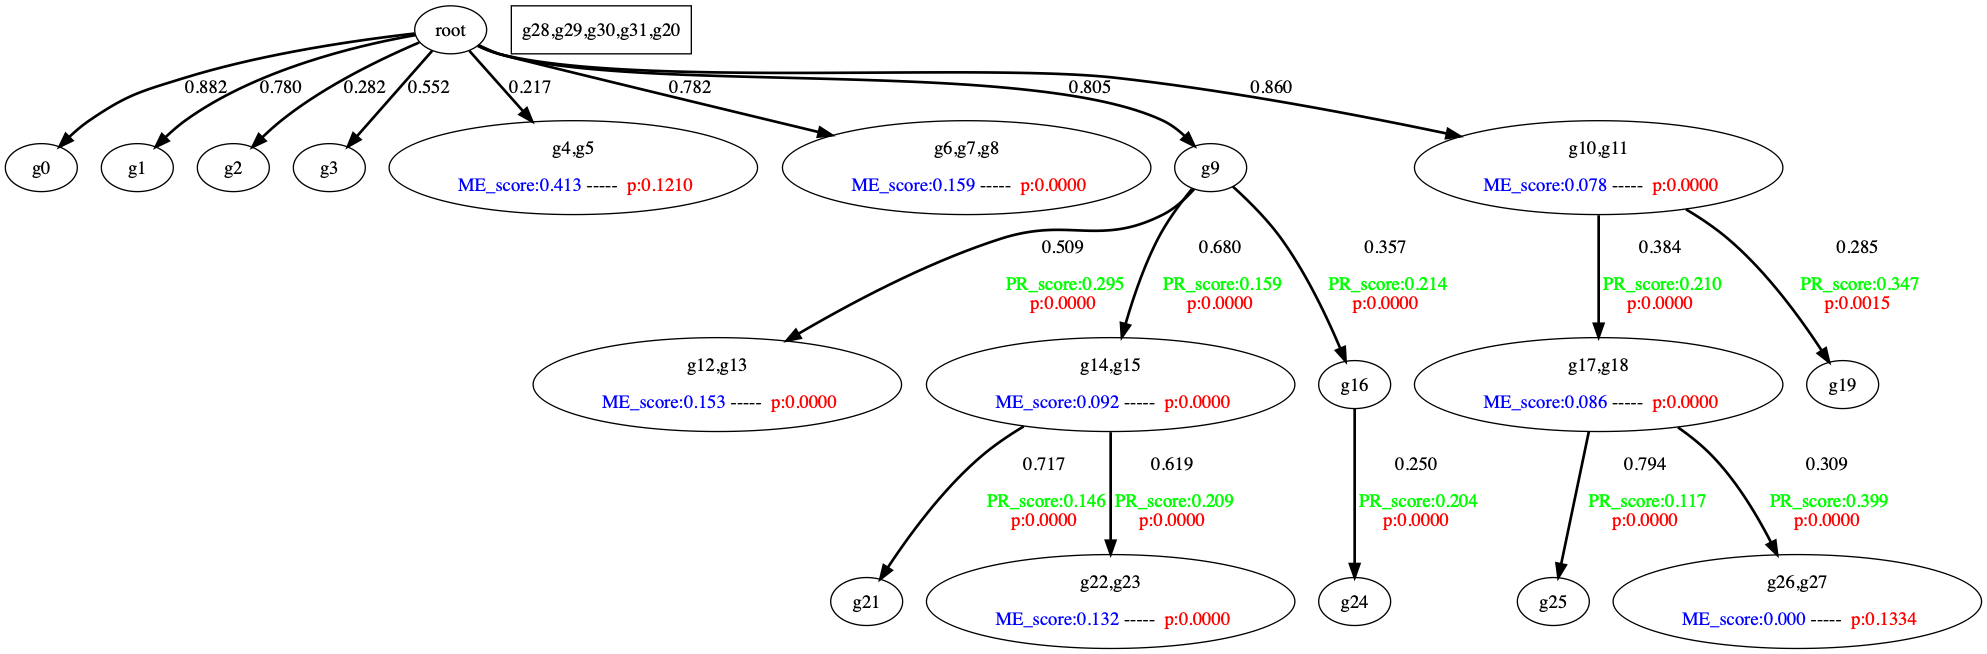

In [29]:
proposal.to_dot(dataset, fig_file='demo/demo_pdetach.png', show_passengers=True)
Image('demo/demo_pdetach.png')

# 14- PAttach (Attach a subset of the passsengers as a new leaf)
* Forward Kernel:
    * Select a non-empty subset of the set of passengers
    * Select a destination parent node (not P)
* Backward Kernel:
    * Select a leaf node

In [30]:
proposal, forward_prob, backward_prob, novel_proposal = gen_progmo.ss_pattach(dataset, True, True)
print("Forward prob: %.5f"%np.exp(forward_prob))
print("Backward prob: %.5f"%np.exp(backward_prob))

Selected subset of passengers:
[30, 31]
Candidate nodes:
[]
[0]
[1]
[2]
[3]
[4, 5]
[6, 7, 8]
[9]
[10, 11]
[12, 13]
[14, 15]
[16]
[17, 18]
[19]
[20]
[21]
[22, 23]
[24]
[25]
[26, 27]
Selected node:
[6, 7, 8]
Backward candidates
[0]
[1]
[2]
[3]
[4, 5]
[19]
[20]
[21]
[22, 23]
[24]
[25]
[26, 27]
[30, 31]
Forward prob: 0.00333
Backward prob: 0.07692


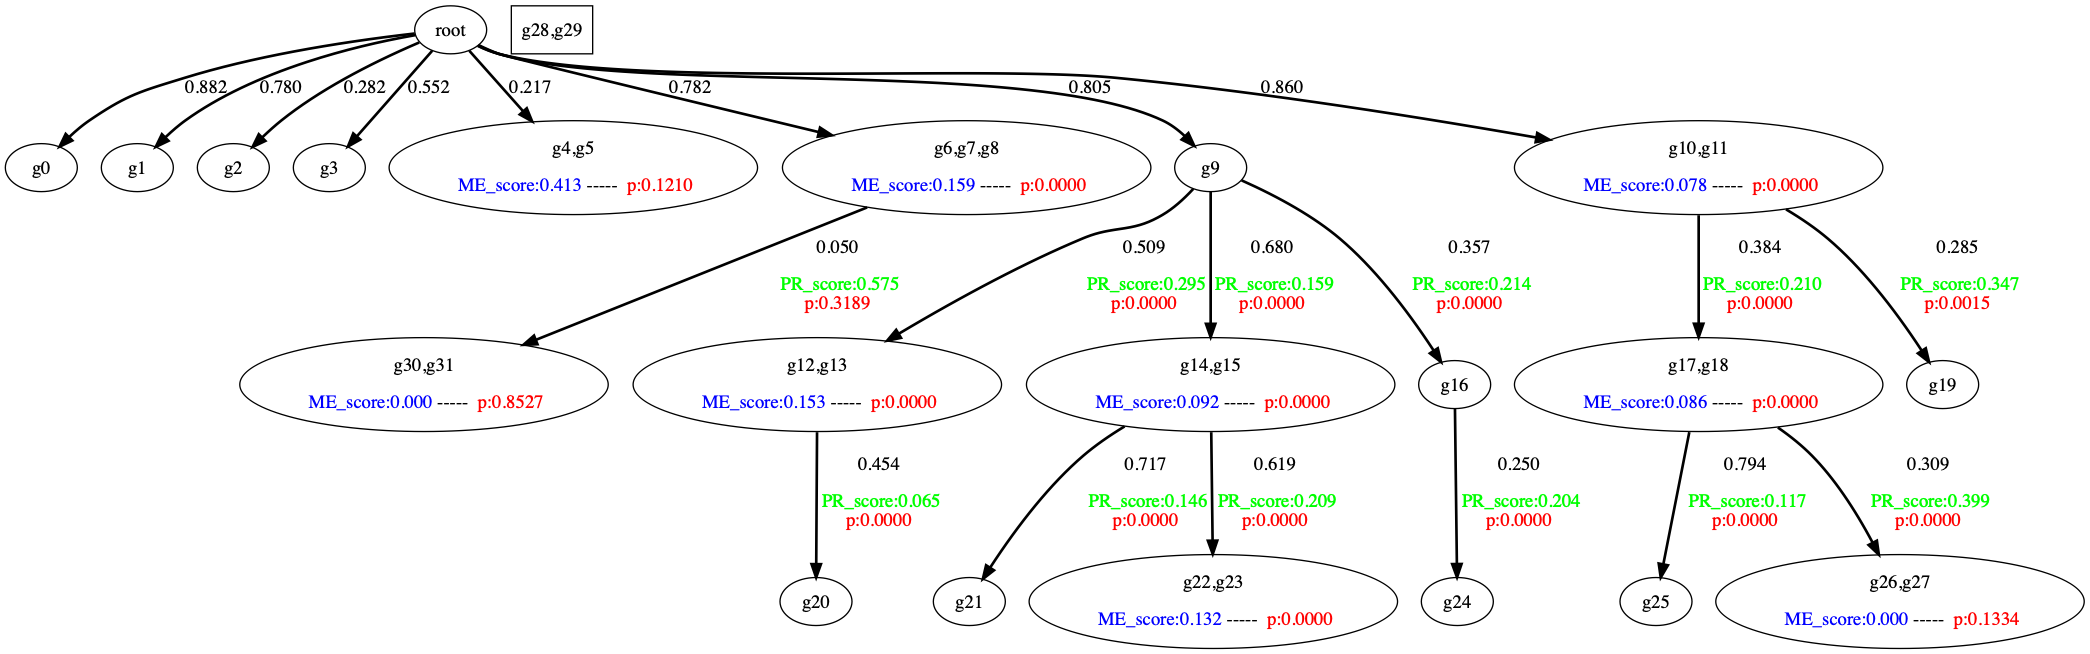

In [31]:
proposal.to_dot(dataset, fig_file='demo/demo_pattach.png', show_passengers=True)
Image('demo/demo_pattach.png')